# Business understanding 

There are 3 main datasets for Seattle that has been provided by AirBNB :

- listings.csv: summary information on listing in Seattle such as: location, host information, cleaning and guest fees, amenities etc.
- calendar.csv: calendar data for the listings: availability dates, price for each date.
- reviews.csv: summary review data for the listings. 


In this analysis we will focus on the following points:
- The evolution of pricing during the seasons in Seattle
- Correlation beetween the price and the rating
- Built a simple prediction model of pricing

# Data preparation

## Libraries

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

## Import Data

In [67]:
listings = pd.read_csv('../Airbnb/listings.csv')
calendar = pd.read_csv('../Airbnb/calendar.csv')

In [68]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [69]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


## Data cleaning & analysis

#### Convert price to floating var

In [70]:
listings['price'] = pd.to_numeric(listings['price'].str.replace('$', '').str.replace(',', ''))
calendar['price'] = pd.to_numeric(calendar['price'].str.replace('$', '').str.replace(',', ''))

/var/folders/g6/1qk2y_4j3gn9v3fdjsc5qjfh0000gn/T/ipykernel_210/631110827.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  listings['price'] = pd.to_numeric(listings['price'].str.replace('$', '').str.replace(',', ''))
/var/folders/g6/1qk2y_4j3gn9v3fdjsc5qjfh0000gn/T/ipykernel_210/631110827.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  calendar['price'] = pd.to_numeric(calendar['price'].str.replace('$', '').str.replace(',', ''))


#### Average price by month 

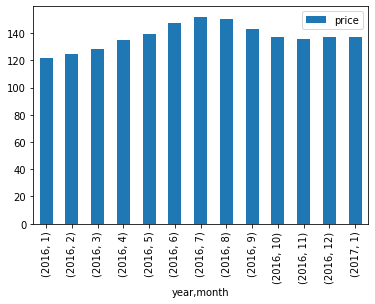

In [71]:
calendar['year'] = pd.DatetimeIndex(calendar['date']).year
calendar['month'] = pd.DatetimeIndex(calendar['date']).month
calendar.groupby(['year','month'])[['price']].mean().plot(kind="bar");

We can see that June through August are the peak months

#### Average price by review score

<AxesSubplot:xlabel='review_scores_value'>

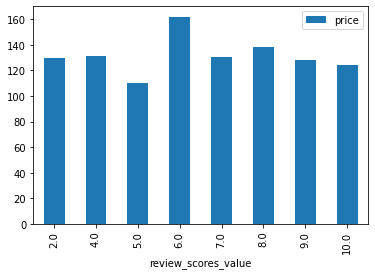

In [72]:
listings.groupby(['review_scores_value'])[['price']].mean().sort_values(by='review_scores_value',ascending=True).plot(kind='bar')


The prices are not affected by rating

# Price prediction

#### Drop usefull variables (ex. : id variables)

In [78]:
var_to_drop = ['id','scrape_id','host_id','last_scraped', 'weekly_price','host_response_time','host_acceptance_rate',
               'monthly_price', 'security_deposit', 'cleaning_fee','license']
df = listings.drop(var_to_drop, axis=1)

#### Drop categorical variable with too much arguments : many categorical variable have heavy information like links or text

In [79]:
cat_var = df.select_dtypes(include=['object']).columns
cat_var

Index(['listing_url', 'name', 'summary', 'space', 'description',
       'experiences_offered', 'neighborhood_overview', 'notes', 'transit',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'is_location_exact',
       'property_type', 'room_type', 'bed_type', 'amenities', 'extra_people',
       'calendar_updated', 'has_availability', 'calendar_last_scraped',
       'first_review', 'last_review', 'requires_license', 'jurisdiction_names',
       'instant_bookable', 'cancellation_policy',
       'require_guest_

List of categorical variable with more than 10 unique values (only for categorical variable)

In [80]:
cat_var_todrop = df[cat_var].nunique() > 10
cat_var[cat_var_todrop]

Index(['listing_url', 'name', 'summary', 'space', 'description',
       'neighborhood_overview', 'notes', 'transit', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_url', 'host_name',
       'host_since', 'host_location', 'host_about', 'host_response_rate',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_verifications', 'street', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'zipcode',
       'property_type', 'amenities', 'extra_people', 'calendar_updated',
       'first_review', 'last_review'],
      dtype='object')

In [81]:
df = df.drop(cat_var[cat_var_todrop], axis=1)

In [82]:
num_var = df.select_dtypes(include=np.number).columns.tolist()
num_var

['host_listings_count',
 'host_total_listings_count',
 'latitude',
 'longitude',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'square_feet',
 'price',
 'guests_included',
 'minimum_nights',
 'maximum_nights',
 'availability_30',
 'availability_60',
 'availability_90',
 'availability_365',
 'number_of_reviews',
 'review_scores_rating',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'calculated_host_listings_count',
 'reviews_per_month']

<AxesSubplot:>

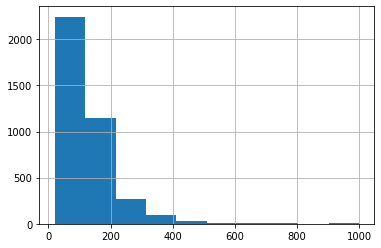

In [83]:
df['price'].hist()

In [84]:
df['price'].describe()

count    3818.000000
mean      127.976166
std        90.250022
min        20.000000
25%        75.000000
50%       100.000000
75%       150.000000
max      1000.000000
Name: price, dtype: float64

In [85]:
df.describe()

,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price,...,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,...,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,3818.000000,3191.000000
mean,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,127.976166,...,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,2.946307,2.078919
std,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,90.250022,...,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,5.893029,1.822348
min,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,20.000000,...,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,1.000000,0.020000
25%,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,75.000000,...,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,1.000000,0.695000
50%,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,100.000000,...,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.540000
75%,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,150.000000,...,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,3.000000
max,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,1000.000000,...,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,37.000000,12.150000


Percentage of NULL value per variable

In [86]:
df.isnull().mean().sort_values(ascending=False).to_frame()

,0
square_feet,0.974594
review_scores_accuracy,0.172342
review_scores_checkin,0.172342
review_scores_value,0.171818
review_scores_location,0.171556
review_scores_cleanliness,0.171032
review_scores_communication,0.170508
review_scores_rating,0.169460
reviews_per_month,0.164222
bathrooms,0.004191


'square_feet' variable has more that 97% of missing values. We are going to drop this variable.

In [87]:
df = df.drop('square_feet', axis = 1)

In [88]:
df.columns

Index(['experiences_offered', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'city', 'state', 'market', 'smart_location',
       'country_code', 'country', 'latitude', 'longitude', 'is_location_exact',
       'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
       'bed_type', 'price', 'guests_included', 'minimum_nights',
       'maximum_nights', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'calendar_last_scraped', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'requires_license',
       'jurisdiction_names', 'instant_bookable', 'cancellation_policy',
       'require_guest_profile_picture', 'require_guest_phone_verification',
       'calculated_

Filling the missing values with the mean for numerical variable

In [90]:
num_vars = df.select_dtypes(include=['float', 'int']).columns
for col in num_vars:
    df[col].fillna((df[col].mean()), inplace=True)

Dummy the categorical variables

In [19]:
cat_vars = df.select_dtypes(include=['object']).copy().columns
for var in  cat_vars:
    # for each cat add dummy var, drop original column
    df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)


In [20]:
df.shape

(3818, 54)

## Function for all cleaning process

In [91]:
def clean_data(df, var_to_drop, max_unique_cat):
    '''
    INPUT
    df - pandas dataframe

    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector

    This function cleans df using the following steps to produce X and y:
    1. Drop usefull variables (ex. : id variables)
    2. Drop all the rows with no price
    2. Create X as all the columns that are not the Salary column
    3. Create y as the Salary column
    4. Drop the Salary, Respondent, and the ExpectedSalary columns
    5. For each numeric variable, fill the column with the mean value.
    6. Create dummy columns for all the categorical variables, drop the original columns
    '''
    # Drop rows with missing salary values
    df = df.drop(var_to_drop, axis=1)
    #Convert price into numeric var 
    df['price'] = pd.to_numeric(df['price'].str.replace('$', '').str.replace(',', ''))
    # Drop var with many unique values
    cat_var_todrop = df[cat_var].nunique() > max_unique_cat
    df = df.drop(cat_var[cat_var_todrop], axis=1)
    # Drop rows with missing salary values
    df = df.dropna(subset=['price'], axis=0)
    y = df['price']

    #Drop square_feet and price column
    df = df.drop(['square_feet','price'], axis = 1)

    # Fill numeric columns with the mean
    num_vars = df.select_dtypes(include=['float', 'int']).columns
    for col in num_vars:
        df[col].fillna((df[col].mean()), inplace=True)

    # Dummy the categorical variables
    cat_vars = df.select_dtypes(include=['object']).copy().columns
    for var in  cat_vars:
        # for each cat add dummy var, drop original column
        df = pd.concat([df.drop(var, axis=1), pd.get_dummies(df[var], prefix=var, prefix_sep='_', drop_first=True)], axis=1)

    X = df
    return X, y



In [104]:
var_to_drop_list = ['id','scrape_id','host_id','last_scraped', 'weekly_price','host_response_time','host_acceptance_rate',
               'monthly_price', 'security_deposit', 'cleaning_fee','license','host_total_listings_count','longitude', 'latitude']


In [105]:
df = pd.read_csv('../Airbnb/listings.csv')
df.shape

(3818, 92)

In [106]:
X,y = clean_data(df,var_to_drop_list,6);

/var/folders/g6/1qk2y_4j3gn9v3fdjsc5qjfh0000gn/T/ipykernel_210/475111032.py:22: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = pd.to_numeric(df['price'].str.replace('$', '').str.replace(',', ''))


## Linear regression

In [107]:
# train and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42);

# Instantiate linear regression model and fitting
lm_model = LinearRegression(normalize=True); 
lm_model.fit(X_train, y_train); 
              

# Prediction   
y_train_preds = lm_model.predict(X_train); 
y_test_preds = lm_model.predict(X_test); 

# Score
print("The rsquared score on the training data was {}.  The rsquared score on the test data was {}.".format(r2_score(y_train, y_train_preds), r2_score(y_test, y_test_preds)))

The rsquared score on the training data was 0.5394890731398768.  The rsquared score on the test data was 0.5733108046315156.


/Users/eliseekabore/opt/miniconda3/envs/projet/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


Coefficients of the linear model 

In [108]:
coefficients = pd.DataFrame()
coefficients['est_int'] = X_train.columns
coefficients['coefs'] = lm_model.coef_
coefficients['abs_coefs'] = np.abs(lm_model.coef_)
coefficients = coefficients.sort_values('abs_coefs', ascending=False)
coefficients

,est_int,coefs,abs_coefs
28,room_type_Shared room,-66.572600,66.572600
27,room_type_Private room,-40.277075,40.277075
2,bathrooms,31.997032,31.997032
25,state_wa,27.303290,27.303290
3,bedrooms,24.769125,24.769125
19,review_scores_value,-13.320047,13.320047
36,require_guest_profile_picture_t,12.604178,12.604178
18,review_scores_location,10.907004,10.907004
1,accommodates,9.519955,9.519955
34,cancellation_policy_moderate,-7.839491,7.839491


# FINDINGS

We were able to built a linear regression with an R2 score of 57% on test data set.
The features that have the most impact on price are the type of room, bathrooms, state_wa, bedrooms and review_scores_value

# Finding optimal model

In [28]:
### Let's see what be the best number of features to use based on the test set performance
def find_optimal_lm_mod(X, y, cutoffs, test_size = .30, random_state=42, plot=True):
    '''
    INPUT
    X - pandas dataframe, X matrix
    y - pandas dataframe, response variable
    cutoffs - list of ints, cutoff for number of non-zero values in dummy categorical vars
    test_size - float between 0 and 1, default 0.3, determines the proportion of data as test data
    random_state - int, default 42, controls random state for train_test_split
    plot - boolean, default 0.3, True to plot result
    
    OUTPUT
    r2_scores_test - list of floats of r2 scores on the test data
    r2_scores_train - list of floats of r2 scores on the train data
    lm_model - model object from sklearn
    X_train, X_test, y_train, y_test - output from sklearn train test split used for optimal model
    '''
    r2_scores_test, r2_scores_train, num_feats, results = [], [], [], dict()
    for cutoff in cutoffs:
        
        #reduce X matrix
        reduce_X = X.iloc[:, np.where((X.sum() > cutoff) == True)[0]]
        num_feats.append(reduce_X.shape[1])

        #split the data into train and test
        X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

        #fit the model and obtain pred response
        lm_model = LinearRegression(normalize=True) 
        lm_model.fit(X_train, y_train)
        y_test_preds = lm_model.predict(X_test)
        y_train_preds = lm_model.predict(X_train)
        
        #append the r2 value from the test set
        r2_scores_test.append(r2_score(y_test, y_test_preds))
        r2_scores_train.append(r2_score(y_train, y_train_preds))
        results[str(cutoff)] = r2_score(y_test, y_test_preds)
    
    if plot:
        plt.plot(num_feats, r2_scores_test, label="Test", alpha=.5)
        plt.plot(num_feats, r2_scores_train, label="Train", alpha=.5)
        plt.xlabel('Number of Features')
        plt.ylabel('Rsquared')
        plt.title('Rsquared by Number of Features')
        plt.legend(loc=1)
        plt.show()
        
    best_cutoff = max(results, key=results.get)
    
    #reduce X matrix
    reduce_X = X.iloc[:, np.where((X.sum() > int(best_cutoff)) == True)[0]]
    num_feats.append(reduce_X.shape[1])

    #split the data into train and test
    X_train, X_test, y_train, y_test = train_test_split(reduce_X, y, test_size = test_size, random_state=random_state)

    #fit the model
    lm_model = LinearRegression(normalize=True) 
    lm_model.fit(X_train, y_train)
        
    return r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test

/Users/eliseekabore/opt/miniconda3/envs/projet/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/eliseekabore/opt/miniconda3/envs/projet/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previou

/Users/eliseekabore/opt/miniconda3/envs/projet/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/Users/eliseekabore/opt/miniconda3/envs/projet/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previou

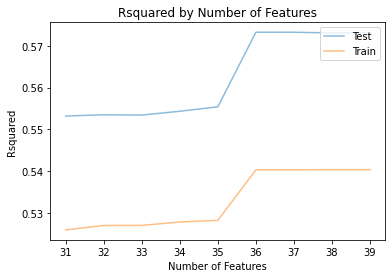

/Users/eliseekabore/opt/miniconda3/envs/projet/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [29]:
cutoffs = [10,20,30,40, 50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800,850,900,950,1000]
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)